In [9]:
import pandas as pd

# Load the CSV file into a DataFrame
#csv_file = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/dataDistances/11-10-2024_AF2_distances_NoLimit.csv'
csv_file = '/Users/adrianahernandezgonzalez/LabNotebook/11-24/states/dataDistances/11-10-2024_AF2_distances_MSA1024.csv'
df = pd.read_csv(csv_file)

# Show the first few rows to confirm the data is loaded correctly
print(df.head())

                                            pdb_file  shortest_ARG126-GLU52  \
0  partial_alphaCav12_unrelaxed_rank_993_alphafol...                    4.0   
1  partial_alphaCav12_unrelaxed_rank_442_alphafol...                    6.7   
2  partial_alphaCav12_unrelaxed_rank_643_alphafol...                    4.6   
3  partial_alphaCav12_unrelaxed_rank_523_alphafol...                    5.7   
4  partial_alphaCav12_unrelaxed_rank_526_alphafol...                    5.4   

   shortest_ARG126-PHE59  shortest_ARG126-GLU62  shortest_ARG129-GLU52  \
0                   15.1                   19.4                    4.5   
1                   17.2                   21.6                    2.4   
2                   14.8                   19.2                    5.1   
3                   16.0                   20.2                    4.0   
4                   15.8                   20.0                    2.0   

   shortest_ARG129-PHE59  shortest_ARG129-GLU62  shortest_ARG132-GLU52  \
0     

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_distances_by_alias_violin(df, alias_dict, exp_distances_list=None, title_custom_add='', colors=None, fig_width=6, fig_height=6, dataset_labels=None, pdb_colors=None):
    """
    Plots the distribution of distances by alias based on the specified columns in the DataFrame,
    and optionally overlays multiple sets of experimental distances as scatter points for each alias.

    Parameters:
    df (pd.DataFrame): The DataFrame containing distance data.
    alias_dict (dict): A dictionary where keys are aliases, and values are the corresponding column names for distances.
    exp_distances_list (list of dicts): A list of dictionaries where each dictionary contains experimental distances for different datasets.
    title_custom_add (str): A custom addition to the plot title.
    colors (list): Optional list of colors to use for the violin plots. Must match the number of aliases.
    fig_width (int/float): The width of the figure.
    fig_height (int/float): The height of the figure.
    dataset_labels (list): List of labels corresponding to each dictionary in exp_distances_list for the legend.
    pdb_colors (list): List of colors to be used for the PDB datasets in the scatter plot.

    Returns:
    None: Displays the violin plot.
    """
    # Prepare the data for plotting
    plot_data = []
    labels = []

    # Loop through the dictionary
    for alias, column_name in alias_dict.items():
        # Check if the column exists in the DataFrame
        if column_name not in df.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            continue
        
        # Extract the distances, dropping NaN values
        distances = df[column_name].dropna()

        # Add the distances and the alias to the plot data
        plot_data.extend(distances)
        labels.extend([alias] * len(distances))  # Repeat the alias label for each distance value

    # Create a new DataFrame for the plotting data
    plot_df = pd.DataFrame({
        'Alias': labels,
        'Distance': plot_data
    })

    # Set a soft, elegant style for the plot
    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})
    
    # Create a color palette, either using the provided colors or defaulting to a subtle seaborn palette
    if colors and len(colors) == len(alias_dict):
        palette = colors
    else:
        palette = sns.color_palette("coolwarm", len(alias_dict))  # Soft gradient palette

    # Plot a violin plot for the distances by alias
    plt.figure(figsize=(fig_width, fig_height))  # Set figure size based on provided width and height
    sns.violinplot(x='Alias', y='Distance', data=plot_df, palette=palette, inner='box', cut=0, linewidth=0.8)

    # Overlay experimental distances for multiple datasets if provided
    if exp_distances_list and dataset_labels:
        if pdb_colors and len(pdb_colors) == len(exp_distances_list):
            colors_for_pdb = pdb_colors
        else:
            # Default to 'black' if colors are not provided or do not match the number of datasets
            colors_for_pdb = ['black'] * len(exp_distances_list)
        
        marker_styles = ['o', 's', 'D', '^', 'v', 'P', '*', 'X']  # Different marker styles
        for i, exp_distances_dict in enumerate(exp_distances_list):
            has_label = False
            for alias, exp_distances in exp_distances_dict.items():
                # Get the x position for the alias on the plot
                xpos = list(alias_dict.keys()).index(alias)
                # Plot each distance in the list
                for exp_distance in exp_distances:
                    plt.scatter([xpos], [exp_distance], color=colors_for_pdb[i % len(colors_for_pdb)], 
                                facecolor='white',  # Set the marker fill color to white
                                edgecolor='black',  # Set the marker border color to black
                                zorder=5, s=30, marker=marker_styles[i % len(marker_styles)],
                                label=dataset_labels[i] if not has_label else "")
          
                    has_label = True  # Add label only once for each dataset

    # Customize the plot appearance for a more elegant look
    plt.title(f'Distribution of Distances {title_custom_add}', fontsize=18, weight='light', pad=20)
    plt.xlabel('Pair of αC', fontsize=24, weight='light')
    plt.ylabel('Distance (Å)', fontsize=24, weight='light')

    # Lighten the gridlines and background to soften the overall appearance
    plt.grid(True, linestyle='--', linewidth=0.5, color='#dcdcdc')
    
    # Rotate the x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=12, weight='light')

    # Remove the top and right spines for a cleaner look
    sns.despine()

    # Use a tighter layout to prevent overlapping of elements
    plt.tight_layout()
    plt.legend(
    bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot (to the right)
    loc='upper left',          # Anchor it to the upper left corner of the legend box
    borderaxespad=0.0)          # Padding between the plot and the legend)
  # Show the legend for datasets
    plt.show()


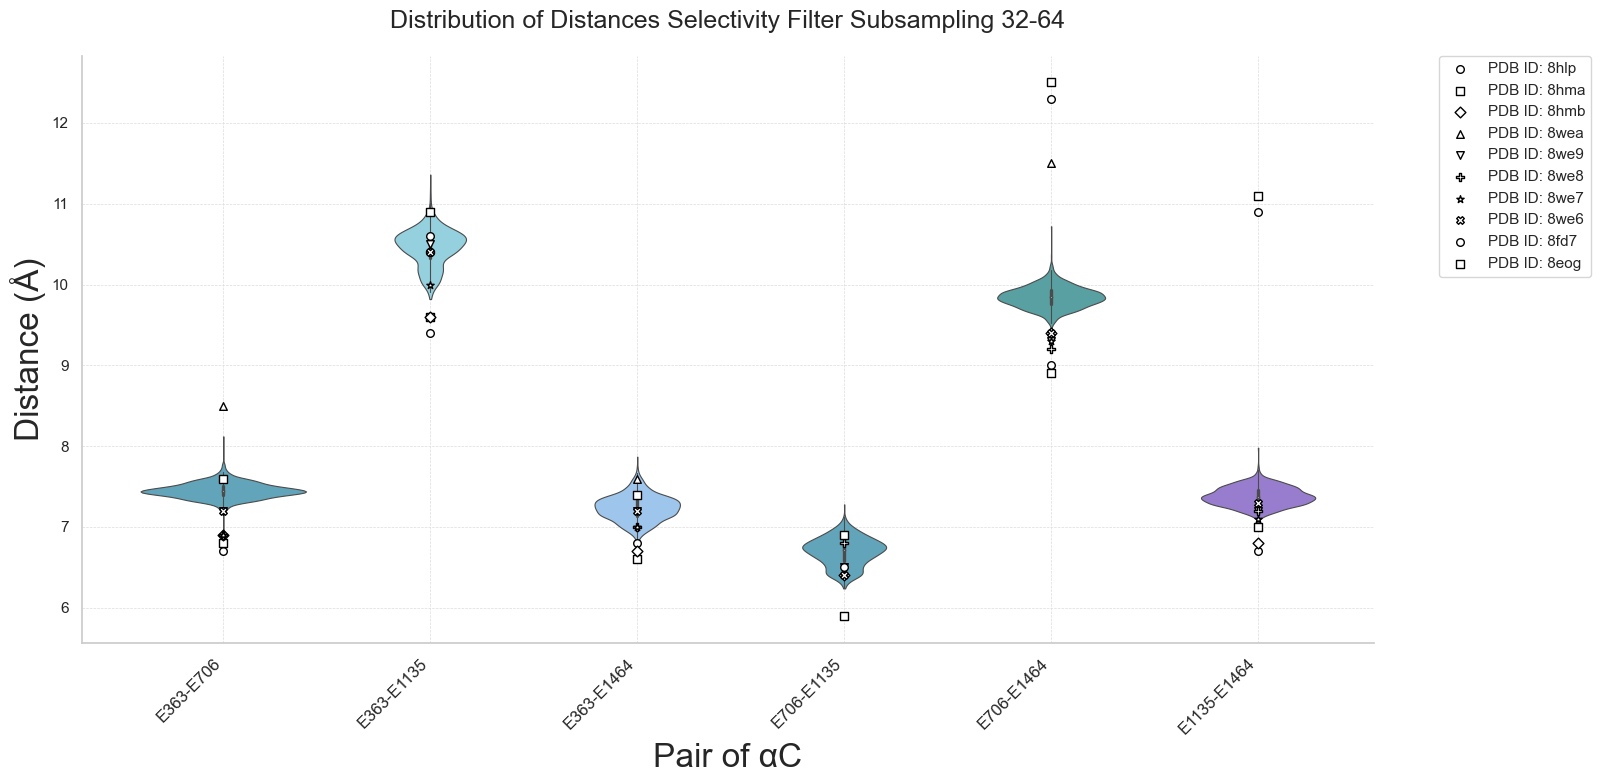

In [11]:

# Example usage
alias_dict = {
    'E363-E706': 'CA_GLU252_CA-GLU595_CA',
    'E363-E1135': 'CA_GLU252_CA-GLU1024_CA',
    'E363-E1464': 'CA_GLU252_CA-GLU1353_CA',
    'E706-E1135': 'CA_GLU595_CA-GLU1024_CA',
    'E706-E1464': 'CA_GLU595_CA-GLU1353_CA',
    'E1135-E1464': 'CA_GLU1024_CA-GLU1353_CA',
}

# Optional list of custom colors for the violin plots
custom_colors = ['#53acc9', '#89d7eb', '#91c7f9', '#53acc9', '#4dabae', '#9370DB']

# Experimental distances to overlay (multiple datasets with lists for each alias)
exp_distances_list = [
    { #8hlp
        'E363-E706': [6.7],
        'E363-E1135': [9.4],
        'E363-E1464': [6.8],
        'E706-E1135': [5.9],
        'E706-E1464': [9.0],
        'E1135-E1464': [6.7]
    },
    { #8hma
        'E363-E706': [6.8],
        'E363-E1135': [9.6],
        'E363-E1464': [6.6],
        'E706-E1135': [5.9],
        'E706-E1464': [8.9],
        'E1135-E1464': [7.0]
    },
    { #8hmb
        'E363-E706': [6.9],
        'E363-E1135': [9.6],
        'E363-E1464': [6.7],
        'E706-E1135': [6.4],
        'E706-E1464': [9.4],
        'E1135-E1464': [6.8]
    },
    { #8wea
        'E363-E706': [8.5],
        #'E363-E1135': [],
        'E363-E1464': [7.6],
        #'E706-E1135': [],
        'E706-E1464': [11.5],
        #'E1135-E1464': []
    },
    { #8we9
        'E363-E706': [7.2],
        'E363-E1135': [10.5],
        'E363-E1464': [7.2],
        'E706-E1135': [6.5],
        'E706-E1464': [9.3],
        'E1135-E1464': [7.2]
    },
    { #8we8
        'E363-E706': [6.9],
        'E363-E1135': [10.4],
        'E363-E1464': [7.0],
        'E706-E1135': [6.8],
        'E706-E1464': [9.2],
        'E1135-E1464': [7.2]
    },
    { #8we7
        'E363-E706': [6.9],
        'E363-E1135': [10.0],
        'E363-E1464': [7.0],
        'E706-E1135': [6.4],
        'E706-E1464': [9.3],
        'E1135-E1464': [7.1]
    },
    { #8we6
        'E363-E706': [7.2],
        'E363-E1135': [10.4],
        'E363-E1464': [7.2], 
        'E706-E1135': [6.4],
        'E706-E1464': [9.4],
        'E1135-E1464': [7.3]
    },
    { #8fd7
        'E363-E706': [7.6],
        'E363-E1135': [10.6], #E1115
        'E363-E1464': [7.4],#1416
        'E706-E1135': [6.5], #E1115
        'E706-E1464': [12.3],
        'E1135-E1464': [10.9]
    },
    { #8eog
        'E363-E706': [7.6],
        'E363-E1135': [10.9],
        'E363-E1464': [7.4],#1416
        'E706-E1135': [6.9],
        'E706-E1464': [12.5],
        'E1135-E1464': [11.1]
    }
]

# Labels for the datasets
dataset_labels = ['PDB ID: 8hlp', 'PDB ID: 8hma', 'PDB ID: 8hmb','PDB ID: 8wea','PDB ID: 8we9','PDB ID: 8we8','PDB ID: 8we7','PDB ID: 8we6','PDB ID: 8fd7','PDB ID: 8eog']

# Custom colors for each PDB dataset
pdb_colors = ['#AC5336', '#D77614','#F99E09','#AC5336','#AB524D','#6BD0A3']

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Selectivity Filter Subsampling 32-64', colors=custom_colors, fig_width=14, fig_height=8, dataset_labels=dataset_labels, pdb_colors=pdb_colors)


In [12]:
# Custom color list
custom_colors_palette = [
    '#ea96a3',  # Recycle 0
    '#e39361',  # Recycle 1
    '#be9b4a',  # Recycle 2
    '#9fa046',  # Recycle 3
    '#7aaa48',  # Recycle 4
    '#48af79',  # Recycle 5
    '#4aac99',  # Recycle 6
    '#4dabae',  # Recycle 7
    '#53acc9',  # Recycle 8
    '#8eaee7',  # Recycle 9
    '#bfa3ea',  # Recycle 10
    '#e689e6',  # Recycle 11
    '#e891c3'   # Recycle 12
]

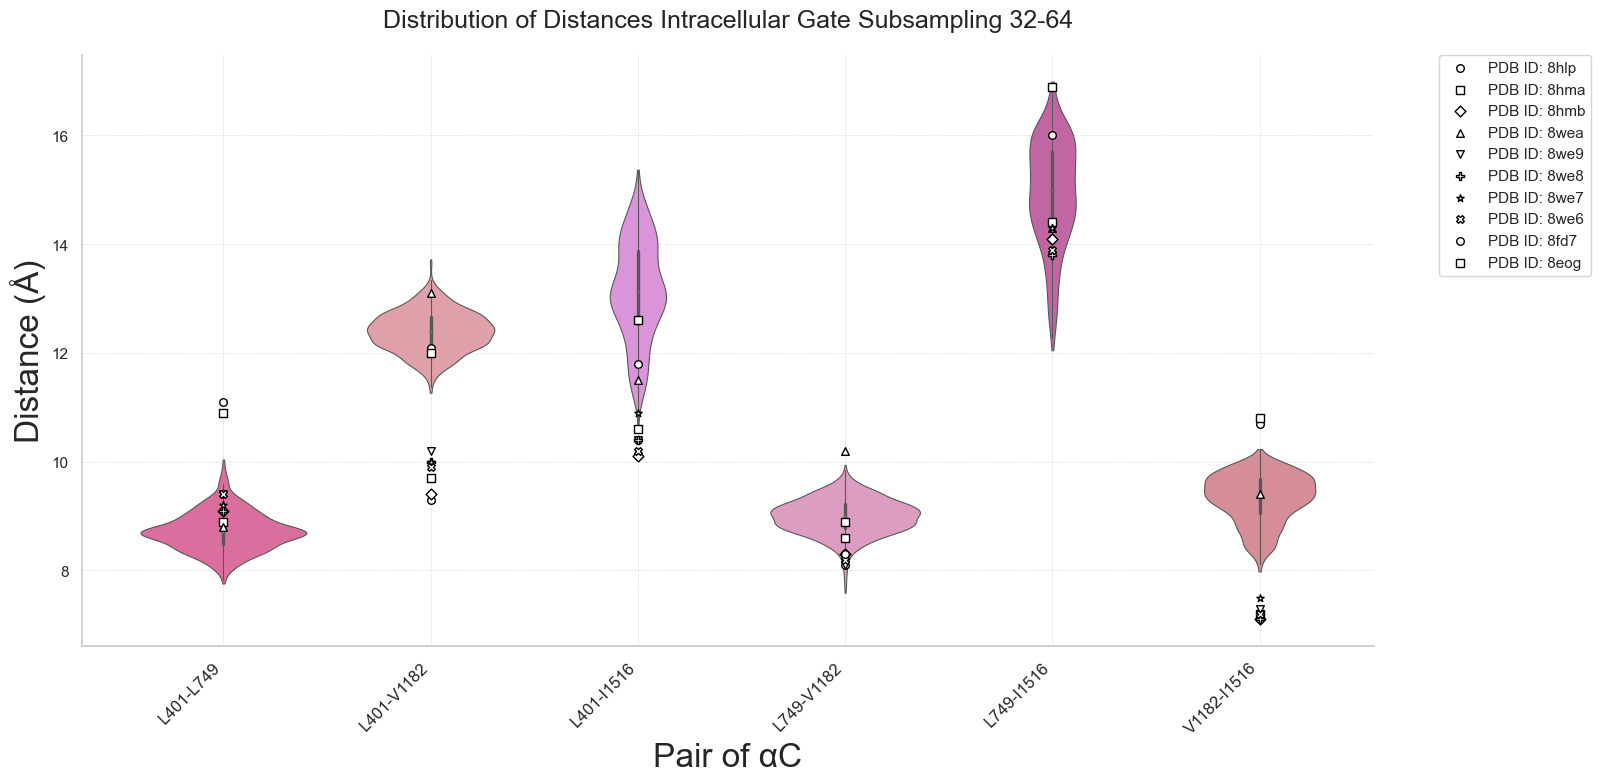

In [13]:

# Example usage
alias_dict = {
    'L401-L749':'CA_LEU290_CA-LEU638_CA',
    'L401-V1182':'CA_LEU290_CA-VAL1071_CA',
    'L401-I1516':'CA_LEU290_CA-ILE1402_CA',
    'L749-V1182':'CA_LEU638_CA-VAL1071_CA',
    'L749-I1516':'CA_LEU638_CA-ILE1402_CA',
    'V1182-I1516':'CA_ILE1402_CA-VAL1071_CA'
}

# Optional list of custom colors for the violin plots
custom_colors = ['#eb5c9e', '#ea96a3', '#e689e6', '#e891c3', '#d057a8', '#e1818f']

# Experimental distances to overlay (example values, with lists for each alias)
exp_distances_list = [
    { #8hlp
    'L401-L749':[8.9],
    'L401-V1182':[9.3],
    'L401-I1516':[10.4],
    'L749-V1182':[8.1],
    'L749-I1516':[14.1],
    'V1182-I1516':[7.1]
}, { #8hma
    'L401-L749':[8.9],
    'L401-V1182':[9.7],
    'L401-I1516':[10.6],
    'L749-V1182':[8.6],
    'L749-I1516':[14.4],
    'V1182-I1516':[7.2]
}, { #8hmb
    'L401-L749':[9.1],
    'L401-V1182':[9.4],
    'L401-I1516':[10.1],
    'L749-V1182':[8.3],
    'L749-I1516':[14.1],
    'V1182-I1516':[7.1]
}, { #8wea
    'L401-L749':[8.8],
    'L401-V1182':[13.1],
    'L401-I1516':[11.5],
    'L749-V1182':[10.2],
    'L749-I1516':[14.3],
    'V1182-I1516':[9.4]
}, { #8we9
    'L401-L749':[9.4],
    'L401-V1182':[10.2],
    'L401-I1516':[10.4],
    'L749-V1182':[8.1],
    'L749-I1516':[13.8],
    'V1182-I1516':[7.3]
}, { #8we8
    'L401-L749':[9.1],
    'L401-V1182':[10.0],
    'L401-I1516':[10.4],
    'L749-V1182':[8.3],
    'L749-I1516':[13.8],
    'V1182-I1516':[7.1]
}, { #8we7
    'L401-L749':[9.2],
    'L401-V1182':[10.0],
    'L401-I1516':[10.9],
    'L749-V1182':[8.2],
    'L749-I1516':[14.3],
    'V1182-I1516':[7.5]
}, { #8we6
    'L401-L749':[9.4],
    'L401-V1182':[9.9],
    'L401-I1516':[10.2],
    'L749-V1182':[8.2],
    'L749-I1516':[13.9],
    'V1182-I1516':[7.2]
}, { #8fd7
    'L401-L749':[11.1],
    'L401-V1182':[12.1], #1162
    'L401-I1516':[11.8], #1468
    'L749-V1182':[8.3], #1162
    'L749-I1516':[16],
    'V1182-I1516':[10.7]
}, { #
    'L401-L749':[10.9],
    'L401-V1182':[12.0],
    'L401-I1516':[12.6],
    'L749-V1182':[8.9],
    'L749-I1516':[16.9],
    'V1182-I1516':[10.8]
}
]
# Labels for the datasets
dataset_labels = ['PDB ID: 8hlp', 'PDB ID: 8hma', 'PDB ID: 8hmb','PDB ID: 8wea','PDB ID: 8we9','PDB ID: 8we8','PDB ID: 8we7','PDB ID: 8we6','PDB ID: 8fd7','PDB ID: 8eog']

# Custom colors for each PDB dataset
pdb_colors = ['#ff5733', '#33ff57', '#3375ff', '#ff33c4', '#ffd633', '#33fff5']

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Intracellular Gate Subsampling 32-64', colors=custom_colors, fig_width=14, fig_height=8, dataset_labels=dataset_labels, pdb_colors=pdb_colors)


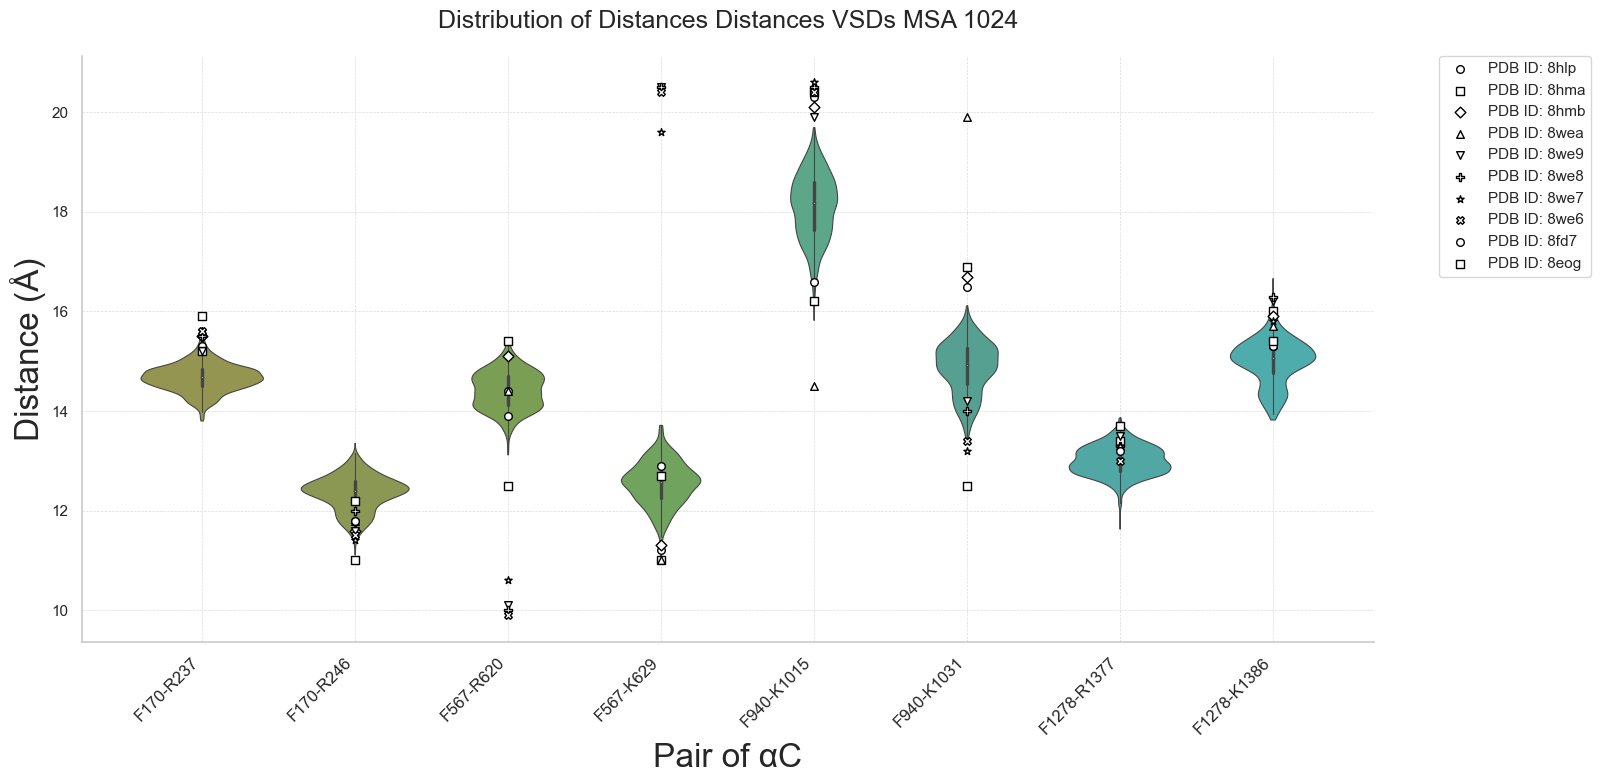

In [15]:
# Gating charges vs the aromatic middle S2
alias_dict = {
    'F170-R237': 'CA_ARG126_CA-PHE59_CA',
    'F170-R246': 'CA_ARG135_CA-PHE59_CA',
    'F567-R620': 'CA_ARG509_CA-PHE456_CA',
    'F567-K629': 'CA_LYS518_CA-PHE456_CA',
    'F940-K1015': 'CA_LYS904_CA-PHE829_CA',
    'F940-K1031': 'CA_ARG916_CA-PHE829_CA',
    'F1278-R1377': 'CA_ARG1266_CA-PHE1167_CA',
    'F1278-K1386': 'CA_LYS1275_CA-PHE1167_CA',
    #'F1278-R1390': 'CA_ARG1279_CA-PHE1167_CA',
}

# Optional list of custom colors for the violin plots
custom_colors = ['#9fa046','#92a348', '#7aaa48','#6aae52', '#4fb38c','#4aac99','#43b5b1','#3ebbbd']

# Experimental distances to overlay (multiple datasets with lists for each alias)
exp_distances_list = [
    { #8hlp
    'F170-R237': [15.3],
    'F170-R246': [11.8],
    'F567-R620': [14.4],
    'F567-K629': [11.2],
    'F940-K1015': [20.3],
    'F940-K1031': [16.5],
    'F1278-R1377': [13.4],
    'F1278-K1386':[15.3],
    #'F1278-R1390': [20.2]
   },
    { #8hma
     'F170-R237': [15.2],
    'F170-R246': [11.0],
    'F567-R620': [15.4],
    'F567-K629': [11.0],
    'F940-K1015': [20.4],
    'F940-K1031': [16.9],
    'F1278-R1377': [13.4],
    'F1278-K1386':[16.0],
    #'F1278-R1390': [20.8]
    },
    { #8hmb
    'F170-R237': [15.5],
    'F170-R246': [11.6],
    'F567-R620': [15.1],
    'F567-K629': [11.3],
    'F940-K1015': [20.1],
    'F940-K1031': [16.7],
    'F1278-K1386':[15.9],
   # 'F1278-R1390': [20.5]    
    },
    { #8wea
    'F170-R237': [15.6],
    'F170-R246': [11.8],
    'F567-R620': [14.4],
    'F567-K629': [11.0],
    'F940-K1015': [14.5], #960
    'F940-K1031': [19.9], #960,1027
    'F1278-R1377': [13.3],
    'F1278-K1386':[15.7],
    #'F1278-R1390': [21.2]   
    },
    { #8we9
    'F170-R237': [15.2],
    'F170-R246': [11.6],
    'F567-R620': [10.1],
    'F567-K629': [20.5],
    'F940-K1015': [19.9],
    'F940-K1031': [14.2],
    'F1278-R1377': [13.5],
    'F1278-K1386':[16.2],
    #'F1278-R1390': [20.9]    
    },
    { #8we8
    'F170-R237': [15.5],
    'F170-R246': [12.0],
    'F567-R620': [10.0],
    'F567-K629': [20.5],
    'F940-K1015': [20.5],
    'F940-K1031': [14.0],
    'F1278-R1377': [13.3],
    'F1278-K1386':[16.3],
    #'F1278-R1390': [21.5]    
    },
    { #8we7
    'F170-R237': [15.6],
    'F170-R246': [11.4],
    'F567-R620': [10.6],
    'F567-K629': [19.6],
    'F940-K1015': [20.6],
    'F940-K1031': [13.2],
    'F1278-R1377': [13.3],
    'F1278-K1386': [15.8], #1278,1386
    #'F1278-R1390': [20.2]    
    },
    { #8we6
    'F170-R237': [15.6],
    'F170-R246': [11.5],
    'F567-R620': [9.9],
    'F567-K629': [20.4],
    'F940-K1015': [20.4],
    'F940-K1031': [13.4],
    'F1278-R1377': [13.0],
    'F1278-K1386': [15.3], #1258
    #'F1278-R1390': [21.4]    
    },
    { #8fd7
    'F170-R237': [15.9],
    'F170-R246': [11.8],
    'F567-R620': [13.9],
    'F567-K629': [12.9], 
    'F940-K1015': [16.6], #F944,995
    'F940-K1031': [12.5],
    'F1278-R1377': [13.2], #1258,1329
    'F1278-K1386': [15.3],
    #'F1278-R1390': [20.2] #1258,1342
    },
    { #8eog
    'F170-R237': [15.9],
    'F170-R246': [12.2],
    'F567-R620': [12.5],
    'F567-K629': [12.7],
    'F940-K1015': [16.2],
    'F940-K1031': [12.5],
    'F1278-R1377': [13.7],
    'F1278-K1386': [15.4],
    #'F1278-R1390': [20.5]    
    }
]

# Labels for the datasets
dataset_labels = ['PDB ID: 8hlp', 'PDB ID: 8hma', 'PDB ID: 8hmb','PDB ID: 8wea','PDB ID: 8we9','PDB ID: 8we8','PDB ID: 8we7','PDB ID: 8we6','PDB ID: 8fd7','PDB ID: 8eog']

# Custom colors for each PDB dataset
pdb_colors = ['#AC5336', '#D77614','#F99E09','#AC5336','#AB524D','#6BD0A3','#50C878','#88D499']

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Distances VSDs MSA 1024', colors=custom_colors, fig_width=14, fig_height=8, dataset_labels=dataset_labels, pdb_colors=pdb_colors)
